In [1]:
import os 
import time 
import datetime 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import tensorflow as tf 
from tensorflow import keras 
from functools import partial 
import seaborn as sns 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D 
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau 
from tensorflow.keras.utils import plot_model 
from keras.models import Sequential 
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout 
from tensorflow.keras.utils import to_categorical

## DATASET

In [2]:
df = pd.read_csv('json_to_excel.csv')
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [3]:
df.shape

(1378033, 11)

In [4]:
start_idx = int(len(df) * 0.7)
start_idx

964623

In [5]:
df_train = df.iloc[:start_idx]
df_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [6]:
df_train.shape

(964623, 11)

In [7]:
df_test = df.iloc[start_idx:]
df_test.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
964623,500d451862af597ef57b3b85817912b9,33009320,ed5b1212a053ed7d6ccc39db64af431c,2,Oh man. I wanted to love this book. I thought ...,Thu Sep 15 22:27:05 -0700 2016,Sun Dec 11 16:52:59 -0800 2016,Sun Nov 27 00:00:00 -0800 2016,NaN,0,0
964624,500d451862af597ef57b3b85817912b9,26074181,924764c0576d48ab45d21ee9eeae13ff,5,Well that was certainly the pairing I was root...,Thu Sep 15 22:25:24 -0700 2016,Mon Oct 31 17:29:24 -0700 2016,Sat Oct 22 00:00:00 -0700 2016,NaN,0,0
964625,500d451862af597ef57b3b85817912b9,22817331,f043315b04e55082ecb169e4615d7718,5,I will be sad and relieved when this trilogy i...,Thu Sep 15 22:19:18 -0700 2016,Fri Aug 25 15:58:39 -0700 2017,Sun Aug 13 00:00:00 -0700 2017,NaN,0,0
964626,500d451862af597ef57b3b85817912b9,28218953,76fea4e0f818f2aed4c4cb3906af6b75,5,I picked up this book because of all the revie...,Thu Sep 15 12:24:16 -0700 2016,Thu Sep 15 12:27:11 -0700 2016,Tue Sep 13 00:00:00 -0700 2016,NaN,0,0
964627,500d451862af597ef57b3b85817912b9,28220872,0ce5f04281b0dae7e7bc74ecb6e647ee,3,There's nothing great about these Fear Street ...,Sat Sep 03 14:45:27 -0700 2016,Thu Jan 19 14:27:50 -0800 2017,Wed Sep 28 00:00:00 -0700 2016,NaN,0,0


In [8]:
df_test.shape

(413410, 11)

## PREPROCESSING 

In the preprocessing step we will take the review text columns and using different libraries we will remove stopwords, punctuations,urls,non_alpha and spoiler


In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops=set(stopwords.words('english')) #imports stopwords from NLTK and creates a set containing common english words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import re #a pattern used to match and manipulate text
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

In [11]:
df_train['review_text']=df_train['review_text'].apply(lambda z: remove_punctuations(z)) #it uses lambda function to remove all punctuations from text in every row

C:\Users\HP\AppData\Local\Temp\ipykernel_21160\464950575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['review_text']=df_train['review_text'].apply(lambda z: remove_punctuations(z)) #it uses lambda function to remove all punctuations from text in every row


In [12]:
import re
def remove_urls(text):
    url = re.compile(r'https\S+')
    return url.sub(r' ',text)

In [13]:
df_train['review_text']=df_train['review_text'].apply(lambda z: remove_urls(z)) #apply is used to remove URLs

C:\Users\HP\AppData\Local\Temp\ipykernel_21160\149046472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['review_text']=df_train['review_text'].apply(lambda z: remove_urls(z)) #apply is used to remove URLs


In [14]:
def remove_non_alpha(text):        #removes all non-alphabetic characters
    alpha=re.compile(r'[^a-zA-Z]') #using re
    return alpha.sub(r' ',text)    #and the result contains only alphabetic characters and spaces

In [15]:
df_train['review_text']=df_train['review_text'].apply(lambda z: remove_non_alpha(z)) #removes characters that are not a-zA-Z

C:\Users\HP\AppData\Local\Temp\ipykernel_21160\2394808895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['review_text']=df_train['review_text'].apply(lambda z: remove_non_alpha(z)) #removes characters that are not a-zA-Z


In [16]:
def remove_spoiler_alert(text):                                     #removes spoiler alerts from text
    return re.sub(r'(\(view spoiler\).*?\(hide spoiler\))','',text) #and replaces any text between view and hide spoiler with an empty string

In [17]:
df_train['review_text']=df_train['review_text'].apply(lambda z: remove_spoiler_alert(z)) #the lambda function likely removes any spoiler alerts present

C:\Users\HP\AppData\Local\Temp\ipykernel_21160\2458257213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['review_text']=df_train['review_text'].apply(lambda z: remove_spoiler_alert(z)) #the lambda function likely removes any spoiler alerts present


In [18]:
def remove(data):            #a regular expression is created that matches
    clean= re.compile(r"\n") #then substitutes them with an empty string 
    data=clean.sub(r'',data) #removing them from input
    return data

## REVIEWING OUR EDITED DATASET

In [19]:
df1=df_train[['review_text','rating']]

In [20]:
df1

,review_text,rating
0,This is a special book It started slow for abo...,5
1,Recommended by Don Katz Avail for free in Dece...,3
2,A fun fast paced science fiction thriller I re...,3
3,Recommended reading to understand what is goin...,0
4,I really enjoyed this book and there is a lot ...,4
...,...,...
964618,Gorgeous,5
964619,I love magical realism but this book just did ...,3
964620,I love the creepyweird and magical atmosphere ...,3
964621,There is nothing about this that I didnt love,5


In [21]:
df1['review_text']=df1['review_text'].apply(lambda z: z.lower()) #converting text to lowercase using lambda function

C:\Users\HP\AppData\Local\Temp\ipykernel_21160\3850304709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review_text']=df1['review_text'].apply(lambda z: z.lower()) #converting text to lowercase using lambda function


In [22]:
df1.duplicated().sum() #checks for duplicated rows and returns a boolean series, which is then summed up to count the true values

12386

In [23]:
df1=df1.drop_duplicates() #only left with unique rows dropping the duplicates

In [24]:
df2=df1.copy() #creating copy of df1 as df2, changes won't affect df1

In [25]:
STOPWORDS = set(stopwords.words('english'))                                         #remove english stopwords
def remove_stopwords(text):                                                         #applies function to 'review-text' column
    """custom function to remove the stopwords"""                                   #and assigns results back
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])  #to the same column

df2["review_text"] = df2["review_text"].apply(lambda text: remove_stopwords(text))
df2.head()

,review_text,rating
0,special book started slow first third middle t...,5
1,recommended katz avail free december httpwwwau...,3
2,fun fast paced science fiction thriller read n...,3
3,recommended reading understand going middle am...,0
4,really enjoyed book lot recommend drag little ...,4


In [26]:
df2.duplicated().sum()

3461

In [27]:
df2=df2.drop_duplicates()

In [28]:
df2

,review_text,rating
0,special book started slow first third middle t...,5
1,recommended katz avail free december httpwwwau...,3
2,fun fast paced science fiction thriller read n...,3
3,recommended reading understand going middle am...,0
4,really enjoyed book lot recommend drag little ...,4
...,...,...
964617,know book trying love movie princess bride yet...,2
964619,love magical realism book work slow slow begin...,3
964620,love creepyweird magical atmosphere love dexte...,3
964621,nothing didnt love,5


## MODEL BUILDING

Now we will start building our model by first calculating Tfidfvector matrix.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() # Tfid vectorizer creates a matrix for the sentences based on word frequency/importance

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer #creates an instance
tfid_matrix=vectorizer.fit_transform(df2['review_text'])    #and then the column gets transformed by method into a matrix of Tfidf feature

In [31]:
tfid_matrix #used to identify importance of each word, calculates term frequency * inverse document frequency for every word in the collection

<948776x676703 sparse matrix of type '<class 'numpy.float64'>'
	with 72724832 stored elements in Compressed Sparse Row format>

In [32]:
y=df2['rating'] #assigning rating column to variable 'y'
X=tfid_matrix   #assigning value to matrix to 'X'

In [33]:
X

<948776x676703 sparse matrix of type '<class 'numpy.float64'>'
	with 72724832 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
#We use truncated singular value decomposition as it works well with the sparse matrix tfid vectorization created
#We only reduce the dimensions to a 100 however better model performance is achieved for a higher number of components
#If we use the premium gpu on google collab pro we can do this and achieve optimal performance at around 400-500 components.

svd = TruncatedSVD(n_components=50) # reduce to 200 components

# Convert sparse matrix to Compressed Sparse Row (CSR) format
X_csr = csr_matrix(tfid_matrix)

# Apply Truncated SVD on the sparse matrix
X = svd.fit_transform(X_csr)

In [35]:
y=df2['rating'].astype('int64')

In [36]:
y

0         5
1         3
2         3
3         0
4         4
         ..
964617    2
964619    3
964620    3
964621    5
964622    5
Name: rating, Length: 948776, dtype: int64

In [37]:
# Tensorflow works with labels starting from 0 while our labels start from 1
# We subtract 1 from each label so the one-hot encoding creates 5 classes instead of 6
#We reverse this when predicting on the test data to get the original labels back

y=y-1
y

0         4
1         2
2         2
3        -1
4         3
         ..
964617    1
964619    2
964620    2
964621    4
964622    4
Name: rating, Length: 948776, dtype: int64

In [38]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y,num_classes=5)


In [40]:
y_onehot


array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [41]:
y_onehot.shape

(948776, 5)

In [42]:
y_val=y_onehot[:4000]
X_val=X[:4000]
y_train=y_onehot[4000:]
X_train=X[4000:]

## Naive Bayes

In [43]:
#Baseline Naive bayes classifer
from sklearn.naive_bayes import GaussianNB #used for classification tasks and assumes that the features are normally distributed
from sklearn.metrics import accuracy_score #to evaluate the accuracy of classification models by comparing predicted and actual labels
model=GaussianNB()                              #predict the ratings for the validation data,
model.fit(X_train,(df2['rating'])[4000:])       #and calculates the accuracy score between the predicted ratings
y_pred=model.predict(X_val)                     #and the actual ratings for the first 4000 rows of the rating column in df2
accuracy_score(y_pred,(df2['rating'])[:4000])

0.40075

## LSTM

In [44]:
#LSTM NEEDS THIS SHAPE (rows,timesteps,features)
X_train_lstm=X_train.reshape(-1,1,50)
X_val_lstm=X_val.reshape(-1,1,50)

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from gensim.models import Word2Vec
from tensorflow.keras.optimizers.legacy import Adam



# LSTM model architecture
model1 = Sequential()
model1.add(LSTM(units=5, input_shape=(1, 50), activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(units=5, activation='softmax'))

# Compiling model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm=model1
history=model_lstm.fit(X_train_lstm,y_train,epochs=5,validation_data=(X_val_lstm,y_val))


Epoch 1/5
29525/29525 [==============================] - 180s 6ms/step - loss: 1.2032 - accuracy: 0.4649 - val_loss: 1.0784 - val_accuracy: 0.4920
Epoch 2/5
29525/29525 [==============================] - 169s 6ms/step - loss: 1.1874 - accuracy: 0.4716 - val_loss: 1.0754 - val_accuracy: 0.4875
Epoch 3/5
29525/29525 [==============================] - 169s 6ms/step - loss: 1.1818 - accuracy: 0.4730 - val_loss: 1.0721 - val_accuracy: 0.4870
Epoch 4/5
29525/29525 [==============================] - 168s 6ms/step - loss: 1.1800 - accuracy: 0.4739 - val_loss: 1.0628 - val_accuracy: 0.4940
Epoch 5/5
29525/29525 [==============================] - 167s 6ms/step - loss: 1.1790 - accuracy: 0.4749 - val_loss: 1.0688 - val_accuracy: 0.4950


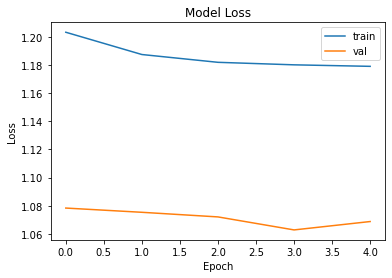

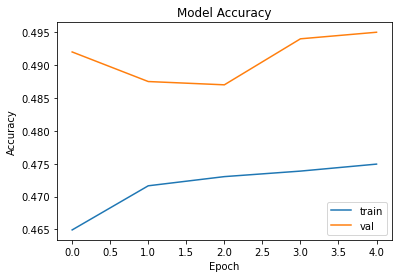

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#defining the function to plot the training and validation metrics
def plot_metrics(history):                                            #object containing training and validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')                                           #plots
    plt.ylabel('Loss')                                                #loss on y-axis
    plt.xlabel('Epoch')                                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')                                       #plots
    plt.ylabel('Accuracy')                                            #accuracy on y-axis
    plt.xlabel('Epoch')                                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

plot_metrics(history)

In [47]:
df_results = pd.DataFrame({'Training Accuracy': history.history['accuracy'],
                   'Testing Accuracy': history.history['val_accuracy'],
                   'Training Loss': history.history['loss'],
                   'Testing Loss': history.history['val_loss']})

#adding mean and standard deviation to dataframe
mean = df_results.mean()
std = df_results.std()

#adding the mean and standard deviation as a new row to the dataframe
df_results.loc['Mean'] = mean
df_results.loc['Std'] = std

#displaying dataframe
print(df_results)

      Training Accuracy  Testing Accuracy  Training Loss  Testing Loss
0              0.464924          0.492000       1.203181      1.078356
1              0.471638          0.487500       1.187365      1.075350
2              0.473033          0.487000       1.181829      1.072071
3              0.473873          0.494000       1.180045      1.062840
4              0.474936          0.495000       1.178972      1.068790
Mean           0.471681          0.491100       1.186278      1.071481
Std            0.003965          0.003681       0.009986      0.006010


## 3 layer model

In [48]:
import tensorflow as tf
#3 layer
input_shape = (1, 50) #defining the input shape

#defining hidden layer sizes
hidden_dim_1 = 128
hidden_dim_2 = 64

output_dim = 5 #defining the number of output categories

model = tf.keras.models.Sequential([                            #defining model architecture
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(hidden_dim_1, activation='relu'),
    tf.keras.layers.Dense(hidden_dim_2, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #model compilation

#printing model summary
model.summary()
model_3layer=model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               6528      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15109 (59.02 KB)
Trainable params: 15109 (59.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
history=model_3layer.fit(X_train_lstm,y_train,epochs=5,validation_data=(X_val_lstm,y_val)) #training model with 3 layers, 7 epochs, and validation

Epoch 1/5
29525/29525 [==============================] - 105s 4ms/step - loss: 1.1270 - accuracy: 0.4987 - val_loss: 1.0488 - val_accuracy: 0.4925
Epoch 2/5
29525/29525 [==============================] - 103s 3ms/step - loss: 1.1108 - accuracy: 0.5058 - val_loss: 1.0387 - val_accuracy: 0.5132
Epoch 3/5
29525/29525 [==============================] - 104s 4ms/step - loss: 1.1067 - accuracy: 0.5074 - val_loss: 1.0309 - val_accuracy: 0.5197
Epoch 4/5
29525/29525 [==============================] - 104s 4ms/step - loss: 1.1038 - accuracy: 0.5085 - val_loss: 1.0311 - val_accuracy: 0.5165
Epoch 5/5
29525/29525 [==============================] - 104s 4ms/step - loss: 1.1015 - accuracy: 0.5101 - val_loss: 1.0496 - val_accuracy: 0.5000


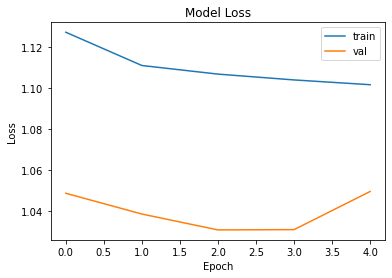

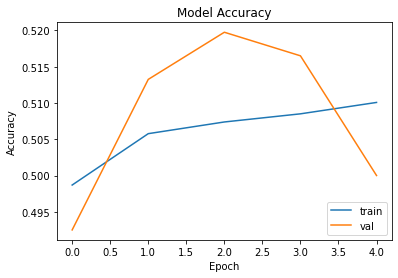

In [50]:
#function to plot loss and accuracy metrics for training or validation
def plot_metrics(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')                           #plots
    plt.ylabel('Loss')                                #loss on y-axis    
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')                       #plots
    plt.ylabel('Accuracy')                            #accuracy on y-axis
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

plot_metrics(history)

In [51]:
df_results = pd.DataFrame({'Training Accuracy': history.history['accuracy'],
                   'Testing Accuracy': history.history['val_accuracy'],
                   'Training Loss': history.history['loss'],
                   'Testing Loss': history.history['val_loss']})

#adding mean and standard deviation to the dataframe
mean = df_results.mean()
std = df_results.std()

#adding mean and standard deviation as a new row to the dataframe
df_results.loc['Mean'] = mean
df_results.loc['Std'] = std

#displaying dataframe
print(df_results)

      Training Accuracy  Testing Accuracy  Training Loss  Testing Loss
0              0.498688          0.492500       1.127012      1.048756
1              0.505770          0.513250       1.110847      1.038667
2              0.507381          0.519750       1.106666      1.030946
3              0.508503          0.516500       1.103836      1.031092
4              0.510073          0.500000       1.101512      1.049628
Mean           0.506083          0.508400       1.109975      1.039818
Std            0.004423          0.011633       0.010140      0.009114


## ADDING GRU

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense #GRU comprises update and reset gates instead of using input

#defining model
model = Sequential()

# Add the embedding layer

#adding GRU layers
model.add(GRU(16, activation='relu', return_sequences=True,input_shape=(1,50)))
model.add(GRU(32, activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu'))

#adding the output layer
model.add(Dense(5, activation='softmax'))

#compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#printing summary of model
model.summary()
model_GRU=model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 16)             3264      
                                                                 
 gru_1 (GRU)                 (None, 1, 32)             4800      
                                                                 
 gru_2 (GRU)                 (None, 64)                18816     
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 27205 (106.27 KB)
Trainable params: 27205 (106.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
history=model_GRU.fit(X_train_lstm,y_train,epochs=5,validation_data=(X_val_lstm,y_val)) #training GRU model on X_train_lstm and y_train for 7 epochs with validation data

Epoch 1/5
29525/29525 [==============================] - 219s 7ms/step - loss: 1.1471 - accuracy: 0.4880 - val_loss: 1.0640 - val_accuracy: 0.4915
Epoch 2/5
29525/29525 [==============================] - 205s 7ms/step - loss: 1.1281 - accuracy: 0.4981 - val_loss: 1.0531 - val_accuracy: 0.5005
Epoch 3/5
29525/29525 [==============================] - 204s 7ms/step - loss: 1.1231 - accuracy: 0.5005 - val_loss: 1.0450 - val_accuracy: 0.5050
Epoch 4/5
29525/29525 [==============================] - 205s 7ms/step - loss: 1.1202 - accuracy: 0.5019 - val_loss: 1.0490 - val_accuracy: 0.5060
Epoch 5/5
29525/29525 [==============================] - 204s 7ms/step - loss: 1.1178 - accuracy: 0.5027 - val_loss: 1.0453 - val_accuracy: 0.5042


In [54]:
df_results = pd.DataFrame({'Training Accuracy': history.history['accuracy'],
                   'Testing Accuracy': history.history['val_accuracy'],
                   'Training Loss': history.history['loss'],
                   'Testing Loss': history.history['val_loss']})

#adding the mean and standard deviation to the dataframe
mean = df_results.mean()
std = df_results.std()

#adding the mean and standard deviation as a new row to the dataframe
df_results.loc['Mean'] = mean
df_results.loc['Std'] = std

#displaying dataframe
print(df_results)

      Training Accuracy  Testing Accuracy  Training Loss  Testing Loss
0              0.488029          0.491500       1.147052      1.063956
1              0.498063          0.500500       1.128066      1.053050
2              0.500464          0.505000       1.123075      1.045014
3              0.501865          0.506000       1.120169      1.049049
4              0.502727          0.504250       1.117785      1.045251
Mean           0.498229          0.501450       1.127229      1.051264
Std            0.005969          0.005938       0.011725      0.007817


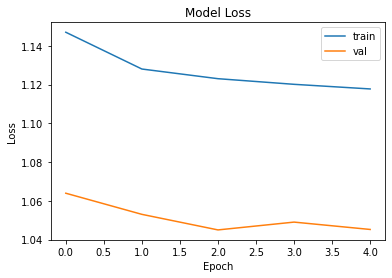

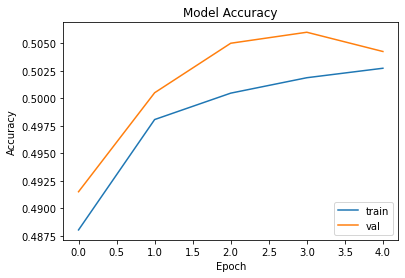

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#defining the function to plot the training and validation metrics
def plot_metrics(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')                           #plots
    plt.ylabel('Loss')                                #loss on y-axis
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')                       #plots
    plt.ylabel('Accuracy')                            #accuracy on y-axis
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

plot_metrics(history)

Epoch 1/5
29525/29525 [==============================] - 121s 4ms/step - loss: 1.1284 - accuracy: 0.4974 - val_loss: 1.0605 - val_accuracy: 0.4910
Epoch 2/5
29525/29525 [==============================] - 117s 4ms/step - loss: 1.1126 - accuracy: 0.5041 - val_loss: 1.0542 - val_accuracy: 0.4918
Epoch 3/5
29525/29525 [==============================] - 119s 4ms/step - loss: 1.1077 - accuracy: 0.5065 - val_loss: 1.0421 - val_accuracy: 0.4992
Epoch 4/5
29525/29525 [==============================] - 122s 4ms/step - loss: 1.1046 - accuracy: 0.5083 - val_loss: 1.0422 - val_accuracy: 0.5052
Epoch 5/5
29525/29525 [==============================] - 104s 4ms/step - loss: 1.1020 - accuracy: 0.5091 - val_loss: 1.0463 - val_accuracy: 0.5153
Epoch 1/5
29525/29525 [==============================] - 113s 4ms/step - loss: 1.1730 - accuracy: 0.4747 - val_loss: 1.0850 - val_accuracy: 0.4672
Epoch 2/5
29525/29525 [==============================] - 110s 4ms/step - loss: 1.1509 - accuracy: 0.4869 - val_loss: 1

Text(0.5, 1.0, 'Effect of Different Activation Functions')

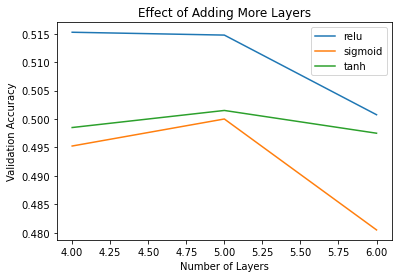

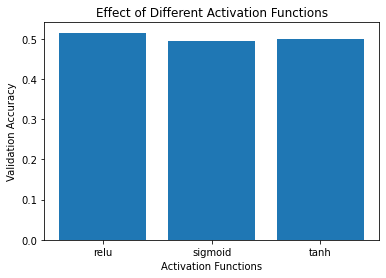

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten

# Define input shape and output dimension
input_shape=(1,50)
output_dim = 5

# Define hyperparameters
hidden_dim_1 = 128
hidden_dim_2 = 64
num_layers = [4, 5, 6]   # Vary the number of layers
activations = ['relu', 'sigmoid', 'tanh']  # Vary the activation functions

# Create a function to build the deep NN model
def build_model(num_layers, activation):
    model = tf.keras.models.Sequential()
    model.add(Flatten(input_shape=input_shape))
    for i in range(num_layers):
        model.add(Dense(hidden_dim_1, activation=activation))
    model.add(Dense(output_dim, activation='softmax'))
    return model

# Train and evaluate the models for different configurations
results = []
for nl in num_layers:
    for act in activations:
        model = build_model(nl, act)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train_lstm, y_train, epochs=5, validation_data=(X_val_lstm, y_val))
        results.append((nl, act, history.history['val_accuracy'][-1]))

# Plot the results of adding more layers
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
for act in activations:
    y = [r[2] for r in results if r[1] == act]
    ax.plot(num_layers, y, label=act)
ax.legend()
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Effect of Adding More Layers')

# Plot the results of different activation functions
fig, ax = plt.subplots()
y = [r[2] for r in results if r[0] == 4]   # Use 4 layers as an example
x_labels = [r[1] for r in results if r[0] ==4 ]
ax.bar(x_labels, y)
ax.set_xlabel('Activation Functions')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Effect of Different Activation Functions')

In [57]:
tfid_matrix_test = vectorizer.transform(df_test['review_text']) #creating a Tfidf matrix from test data reviews

In [58]:
print(tfid_matrix_test) #printing tfidf matrix to test

  (0, 664269)	0.09283043218119913
  (0, 643105)	0.06583319560964136
  (0, 598788)	0.05946695261806527
  (0, 561833)	0.08353906630816219
  (0, 507630)	0.08911381704337334
  (0, 502717)	0.08328547717320317
  (0, 479740)	0.0389018927704853
  (0, 477308)	0.03508898218809589
  (0, 476435)	0.2717887017742916
  (0, 444219)	0.11095773402680428
  (0, 418940)	0.03700154073918458
  (0, 414886)	0.07453667030798093
  (0, 362109)	0.0737251298071911
  (0, 353622)	0.07247742011276884
  (0, 352326)	0.06554482336642163
  (0, 347252)	0.1416509916320744
  (0, 344001)	0.10169422215793512
  (0, 343751)	0.04284503552168987
  (0, 304772)	0.523532994404007
  (0, 264518)	0.09648492032006875
  (0, 251274)	0.6324420726165129
  (0, 194775)	0.08662694103548524
  (0, 182305)	0.04725501475590596
  (0, 159438)	0.15397452829058733
  (0, 155074)	0.07285138489102579
  :	:
  (413409, 57593)	0.04615635648420482
  (413409, 54509)	0.02666745179410078
  (413409, 52864)	0.03313781333629319
  (413409, 52402)	0.02704934449178914

In [59]:
X_test_svd=svd.transform(csr_matrix(tfid_matrix_test)) #transforming test data using SVD

In [60]:
X_test12 = X_test_svd.reshape(X_test_svd.shape[0],1,X_test_svd.shape[1]) #reshaping X_test_svd to 3D array

In [61]:
#we can predict on the test set after reshaping as shown above using the fitted
#deep,shallow lstm or gru model
#we create a different shape when using the 1d cnn later on in the notebook 
y_pred=model_GRU.predict(X_test12) #predicting output using GRU model on test data

12920/12920 [==============================] - 40s 3ms/step


In [62]:
y_pred=np.argmax(y_pred, axis=1) #converting y_pred to its highest index position

In [63]:
y_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [64]:
y_pred=y_pred.reshape(-1,1) #reshapeing y_pred to a single column

In [65]:
#reversing what we did to predict on the test data
y_pred=y_pred+1

In [66]:
y_pred #predicted output or value from a model

array([[5],
       [5],
       [5],
       ...,
       [5],
       [5],
       [5]], dtype=int64)

In [67]:
id=((df_test['review_id']).to_numpy()) #converting review_id column in df_test to numpy array

In [68]:
id=id.reshape(-1,1) #reshaping id as a single column array

In [69]:
pred=np.column_stack((id,y_pred)) #creating a new array by stacking id and y_pred

In [70]:
pred

array([['ed5b1212a053ed7d6ccc39db64af431c', 5],
       ['924764c0576d48ab45d21ee9eeae13ff', 5],
       ['f043315b04e55082ecb169e4615d7718', 5],
       ...,
       ['9b19eff33ddb14e9e68fca2e90379e46', 5],
       ['8be463fed78f0da63e964706f710332b', 5],
       ['62ed1263c7d216986cc419cd4e8a408b', 5]], dtype=object)

In [71]:
dfpred = pd.DataFrame(pred, columns=['review_id', 'rating']) #creating a pandas DataFrame with columns "review_id" and "rating", using values from "pred"

In [72]:
dfpred['rating'].value_counts()

4    193848
5    157353
3     51622
2      7155
1      3432
Name: rating, dtype: int64

In [73]:
#we try 1D CNN with GloVe embeddings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
X=df2['review_text']
print(X[0])
y_val=y_onehot[:4000]
X_val=X[:4000]
y_train=y_onehot[4000:]
X_train=X[4000:]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) #fitting tokenizer only on train data

#calculating vocabulary size using a tokenizer
vocab_size = len(tokenizer.word_index)
print(vocab_size)

special book started slow first third middle third started get interesting last third blew mind love good science fiction pushes thinking things go hugo winner translated original chinese made interesting different way things ive read instance intermixing chinese revolutionary history kept accusing people reactionaries etc book science aliens science described book impressive book grounded physics pretty accurate far could tell view spoilerthough got folding protons dimensions think making stuff interesting think though would happen seti stations received message found someone person monitoring answering signal side disillusioned part book bit dark would like think human reaction discovering alien civilization hostile would like enders game would band together like book unveiled trisolaran culture game smart way build empathy also understand theyve gone across many centuries know body problem unsolvable math problem still dont get made game maybe come next book loved quote long history

In [ ]:
s